In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import math
import statistics
import numpy as numpy
import scipy.stats
from scipy import stats
import sklearn
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [2]:
pd.options.display.max_columns=None 
pd.options.display.max_rows=None 

In [20]:
os.chdir(r"C:\Users\duygu.keten\Desktop\M&E_Dosya\PDM11")
dff = pd.read_spss("dff.sav")

In [21]:
dff.head()

,aspb,Date,a2,ESSNBenef,CCTEBenef,EnrolledOtherAsst3mon,province,district,SexInterviewee,RelationshiptoHHH,MaritalStatuHHH,GenderHHH,boys0to1,boys2to5,boys6to12,boys13to17,men18to59,menOver60,girls0to1,girls2to5,girls6to12,girls13to17,women18to59,womenOver60,hh_males,hh_females,hh_total,hh_confirm,num_child_schoolattnd,attend_online_cirriculum,attend_online_no,attend_online_device,attend_online_challenges,Highest_Education_RelationshiptoHHH,Highest_Education_HH_Individual,AnyHHMember_SpeakTurkish,AnyHHMember_ReadWriteTurkish,FOOD_CONS_STARTS,cons_cereal,cons_veg,cons_fruit,cons_meat,cons_pulses,cons_dairy,cons_oil,cons_sugar,cons_spice,REDUCED_COPING_STARTS,cope_lessexpfood,cope_borrowfood,cope_reducemealno,cope_reduceportionsize,cope_reduceadultfood,LIVELIHOOD_COPING_STARTS,lhood_ST_soldhhasset,lhood_ST_spentsavings,lhood_ST_foodcredit,lhood_ST_borrowmoney,lhood_ST_unusualfood,lhood_CR_soldprodasset,lhood_CR_noschool,lhood_CR_lesshealth,lhood_CR_lessedu,lhood_EM_hhmove,lhood_EM_childwork,lhood_EM_beg,lhood_EM_return,NumberofWorkingindividuals,Covid_unemployment,Total_income_excludeESSNCCTE,Worker_inkind_item,Coverage_Needs_TL,debt_YN,debt_to_whom,debt_to_whom_ESSNBeneficiary,debt_to_whom_ESSNBeneficiary_other,reason_for_debt,total_debt_TL,total_debt_USD,debt_3monthsYN,Essn_debtrepay_conditions,x_food7days_inhouse,x_food7days_outside,x_rent,x_utilities,x_health,x_hygiene,x_education,x_water,x_debtrepay,x_comms,x_transport_public,x_transport_intercity,x_clothing,x_gifts,x_celebrations,x_remittances,x_other,main_income,second_income,third_income,prov_code,stratum,ESSNandCCTEbenef,num_IndividualinHH,HHsize_group,num_working_age,num_elderly,num_children,num_schoolage_children,DependencyRatio,num_adults,s_0to5,s_6to17,s_18to59,s_over60,prop_schoolattendance,NoSchoolAttendance,AllSchoolAttendance,FCS,FCG,FCG_4pt,DDSCereals,DDSVegetables,DDSFruits,DDSMeat,DDSPulses,DDSDairy,DDSOil,DDS,rcsi_lesspreferred,rcsi_borrow,rcsi_reducemeals,rcsi_reduceportion,rcsi_restrictadult,rCSI,UsedStressCoping,UsedCrisisCoping,UsedEmergencyCoping,MaxCopingBehavior,x_food30days_inhouse,x_food30days_outside,x_food30days_total,x_total,x_total_noremit,x_pc_total,x_pc_total_noremit,x_pc_food30days,x_pc_rent,x_pc_utilities,x_pc_health,x_pc_hygiene,x_pc_education,x_pc_water,x_pc_debtrepay,x_pc_comms,x_pc_transport,x_pc_clothing,x_pc_gifts,x_pc_celebration,x_pc_remittances,x_pc_other,s_food30days,s_rent,s_utilities,s_health,s_hygiene,s_education,s_water,s_debtrepay,s_comms,s_transport,s_clothing,s_gifts,s_remittances,s_other,s_food30days_noremit,s_rent_noremit,s_utilities_noremit,s_health_noremit,s_hygiene_noremit,s_education_noremit,s_water_noremit,s_debtrepay_noremit,s_comms_noremit,s_transport_noremit,s_clothing_noremit,s_gifts_noremit,s_remittances_noremit,s_other_noremit,total_debt,prop_total_debt,prop_total_debt_noremit,anyremitYN,HHindebtYN,debt_percapita,filter_ESSNBeneficiarySelect,cons_total_TRC_Overall,EssantialNeeds_TRC,EssantialNeeds_TRC_Ratio_Indc,cons_total_TRC_Overall_PerCapita,IndicatorWB,HH_Work_Ratio_HHSize,WorkerDependentRatio,Income_Per_Capita_exclude,TopUps,Estimated_ESSN_Assistance,Income_Including_Assistance,Income_Per_Capita_include,IndicatorR22,IndicatorR22EKSTRA,Vulnerability4,DebtRepayIncomeRatio,DebtRepayExpenditureRatio,CoverageNeedBinary,Min1Worker2,Share_Workers,Debt_incomewithassistance_ratio,debt_income_pc_ratio,IncomeDebtvsXTOTAL,Weights,LCSI_ST_soldhhasset,LCSI_ST_spentsavings,LCSI_ST_foodcredit,LCSI_ST_borrowmoney,LCSI_ST_unusualfood,LCSI_CR_soldprodasset,LCSI_CR_noschool,LCSI_CR_lesshealth,LCSI_CR_lessedu,LCSI_EM_hhmove,LCSI_EM_childwork,LCSI_EM_beg,LCSI_EM_return,LCSI,Age0to1,Age2to5,Age6to12,Age13to17,Age18to59,Age60,Clusters_Soft,Clusters_Corrected,filter_$,Vulnerability_PDM11,PDM11_severity_more_category,PDM11_severity_index,HHsize_squared,income_pc_squared,Vulnerability_income_response_PDM11,Vulnerability_FINAL,Vulnerability_quantile_splitting,awoman,awomen_single,square_num_individualHH,Quantile_splitting_5categories,

In [22]:
dff.groupby(['aa'])['x_total'].median()

ESSNBenef
                           NaN
Beneficiary        3160.714286
Non-Beneficiary    3026.714286
Name: x_total, dtype: float64

In [23]:
PDM11["ESSNBenef"].shape

(5147,)

In [25]:
r1 = dff.groupby(["aa"])["Total_income_excludeESSNCCTE"].agg({"median"})
r1

,median
ESSNBenef,
,NaN
Beneficiary,1500.0
Non-Beneficiary,2000.0


In [26]:
pd.pivot_table(dff, values= 'Total_income_excludeESSNCCTE', index=['aa', 'stratum'], aggfunc='median').reset_index()

,ESSNBenef,stratum,Total_income_excludeESSNCCTE
0,Beneficiary,Aegean,1775.0
1,Beneficiary,Anatolia/Thrace,1500.0
2,Beneficiary,Istanbul,2200.0
3,Beneficiary,Mediterranean,1500.0
4,Beneficiary,South-east,1200.0
5,Non-Beneficiary,Aegean,2200.0
6,Non-Beneficiary,Anatolia/Thrace,1900.0
7,Non-Beneficiary,Istanbul,2500.0
8,Non-Beneficiary,Mediterranean,1800.0
9,Non-Beneficiary,South-east,1500.0


In [28]:
PDM11["GenderHHH"].describe(include=np.object)  # dataset içinde bir variable için describe

count     5147
unique       3
top       male
freq      3445
Name: GenderHHH, dtype: object

In [29]:
PDM11.describe(include=np.object)  # dataset için describe

,aspb,Date,a2,province,district,hh_confirm,attend_online_no,attend_online_device,attend_online_challenges,Highest_Education_RelationshiptoHHH,debt_to_whom,debt_to_whom_ESSNBeneficiary,debt_to_whom_ESSNBeneficiary_other,reason_for_debt,main_income,second_income,third_income,strata_recode,multi_attend_device,attend_challenges1,attend_challlenges2,attend_challenges3,debt_to_whom1,debt_to_whom2,debt_to_whom3,debt_reason1,debt_reason2,debt_reason3
count,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147,5147
unique,3983,48,11,69,315,2,59,4,19,9,8,3,14,166,13,14,13,6,4,6,5,3,4,3,2,17,17,15
top,,,,,,OK,,,,head_hh,,no,,,unskilled_labor,essn_card,no_income,,,,,,friends,,,,,
freq,1163,1163,1163,1163,1163,3984,4011,3343,3343,2231,1977,2601,5134,1977,1929,1528,1549,1163,3343,3343,4958,5128,2462,3515,5115,1977,2857,3920


In [32]:
crosstab = pd.crosstab(PDM11["Total_income_excludeESSNCCTE"], PDM11["GenderHHH"])
crosstab.head()

GenderHHH,female,male
Total_income_excludeESSNCCTE,,
0.0,63,151
20.0,1,0
30.0,1,0
50.0,1,2
60.0,1,0


In [46]:
crosstab_ESSN = pd.crosstab(PDM11["debt_YN"], PDM11["GenderHHH"])
crosstab_ESSN.head()

GenderHHH,,female,male
debt_YN,,,
,1163,0,0
No,0,104,710
Yes,0,435,2735


Text(0.5, 1.0, 'Question-title')

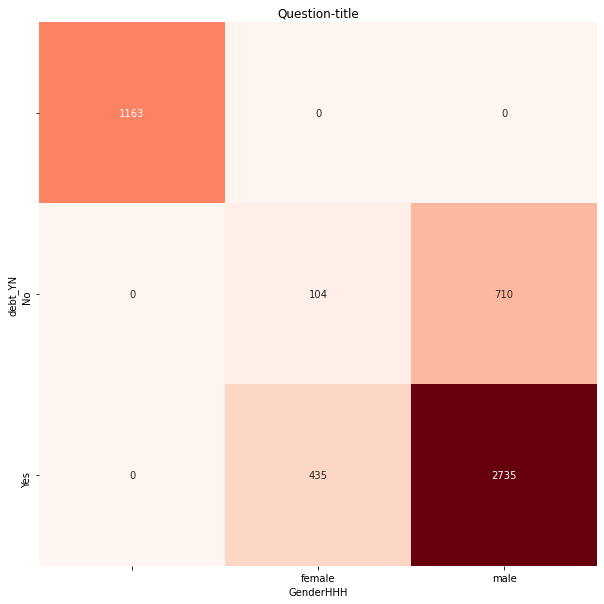

In [47]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(crosstab_ESSN, cmap="Reds", annot=True, cbar=False, fmt='g')
ax.set_title("Question-title")

In [48]:
df = dff.drop(0)

In [52]:
df.head(2)

,aspb,Date,a2,ESSNBenef,CCTEBenef,EnrolledOtherAsst3mon,province,district,SexInterviewee,RelationshiptoHHH,MaritalStatuHHH,GenderHHH,boys0to1,boys2to5,boys6to12,boys13to17,men18to59,menOver60,girls0to1,girls2to5,girls6to12,girls13to17,women18to59,womenOver60,hh_males,hh_females,hh_total,hh_confirm,num_child_schoolattnd,attend_online_cirriculum,attend_online_no,attend_online_device,attend_online_challenges,Highest_Education_RelationshiptoHHH,Highest_Education_HH_Individual,AnyHHMember_SpeakTurkish,AnyHHMember_ReadWriteTurkish,FOOD_CONS_STARTS,cons_cereal,cons_veg,cons_fruit,cons_meat,cons_pulses,cons_dairy,cons_oil,cons_sugar,cons_spice,REDUCED_COPING_STARTS,cope_lessexpfood,cope_borrowfood,cope_reducemealno,cope_reduceportionsize,cope_reduceadultfood,LIVELIHOOD_COPING_STARTS,lhood_ST_soldhhasset,lhood_ST_spentsavings,lhood_ST_foodcredit,lhood_ST_borrowmoney,lhood_ST_unusualfood,lhood_CR_soldprodasset,lhood_CR_noschool,lhood_CR_lesshealth,lhood_CR_lessedu,lhood_EM_hhmove,lhood_EM_childwork,lhood_EM_beg,lhood_EM_return,NumberofWorkingindividuals,Covid_unemployment,Total_income_excludeESSNCCTE,Worker_inkind_item,Coverage_Needs_TL,debt_YN,debt_to_whom,debt_to_whom_ESSNBeneficiary,debt_to_whom_ESSNBeneficiary_other,reason_for_debt,total_debt_TL,total_debt_USD,debt_3monthsYN,Essn_debtrepay_conditions,x_food7days_inhouse,x_food7days_outside,x_rent,x_utilities,x_health,x_hygiene,x_education,x_water,x_debtrepay,x_comms,x_transport_public,x_transport_intercity,x_clothing,x_gifts,x_celebrations,x_remittances,x_other,main_income,second_income,third_income,prov_code,stratum,ESSNandCCTEbenef,num_IndividualinHH,HHsize_group,num_working_age,num_elderly,num_children,num_schoolage_children,DependencyRatio,num_adults,s_0to5,s_6to17,s_18to59,s_over60,prop_schoolattendance,NoSchoolAttendance,AllSchoolAttendance,FCS,FCG,FCG_4pt,DDSCereals,DDSVegetables,DDSFruits,DDSMeat,DDSPulses,DDSDairy,DDSOil,DDS,rcsi_lesspreferred,rcsi_borrow,rcsi_reducemeals,rcsi_reduceportion,rcsi_restrictadult,rCSI,UsedStressCoping,UsedCrisisCoping,UsedEmergencyCoping,MaxCopingBehavior,x_food30days_inhouse,x_food30days_outside,x_food30days_total,x_total,x_total_noremit,x_pc_total,x_pc_total_noremit,x_pc_food30days,x_pc_rent,x_pc_utilities,x_pc_health,x_pc_hygiene,x_pc_education,x_pc_water,x_pc_debtrepay,x_pc_comms,x_pc_transport,x_pc_clothing,x_pc_gifts,x_pc_celebration,x_pc_remittances,x_pc_other,s_food30days,s_rent,s_utilities,s_health,s_hygiene,s_education,s_water,s_debtrepay,s_comms,s_transport,s_clothing,s_gifts,s_remittances,s_other,s_food30days_noremit,s_rent_noremit,s_utilities_noremit,s_health_noremit,s_hygiene_noremit,s_education_noremit,s_water_noremit,s_debtrepay_noremit,s_comms_noremit,s_transport_noremit,s_clothing_noremit,s_gifts_noremit,s_remittances_noremit,s_other_noremit,total_debt,prop_total_debt,prop_total_debt_noremit,anyremitYN,HHindebtYN,debt_percapita,filter_ESSNBeneficiarySelect,cons_total_TRC_Overall,EssantialNeeds_TRC,EssantialNeeds_TRC_Ratio_Indc,cons_total_TRC_Overall_PerCapita,IndicatorWB,HH_Work_Ratio_HHSize,WorkerDependentRatio,Income_Per_Capita_exclude,TopUps,Estimated_ESSN_Assistance,Income_Including_Assistance,Income_Per_Capita_include,IndicatorR22,IndicatorR22EKSTRA,Vulnerability4,DebtRepayIncomeRatio,DebtRepayExpenditureRatio,CoverageNeedBinary,Min1Worker2,Share_Workers,Debt_incomewithassistance_ratio,debt_income_pc_ratio,IncomeDebtvsXTOTAL,Weights,LCSI_ST_soldhhasset,LCSI_ST_spentsavings,LCSI_ST_foodcredit,LCSI_ST_borrowmoney,LCSI_ST_unusualfood,LCSI_CR_soldprodasset,LCSI_CR_noschool,LCSI_CR_lesshealth,LCSI_CR_lessedu,LCSI_EM_hhmove,LCSI_EM_childwork,LCSI_EM_beg,LCSI_EM_return,LCSI,Age0to1,Age2to5,Age6to12,Age13to17,Age18to59,Age60,Clusters_Soft,Clusters_Corrected,filter_$,Vulnerability_PDM11,PDM11_severity_more_category,PDM11_severity_index,HHsize_squared,income_pc_squared,Vulnerability_income_response_PDM11,Vulnerability_FINAL,Vulnerability_quantile_splitting,awoman,awomen_single,square_num_individualHH,Quantile_splitting_5categories,

In [75]:
important_consideration = dff[["LCSI", "rCSI", "FCS", "total_debt", "aa","GenderHHH","debt_to_whom"]]
important_consideration.head(2)

,LCSI,rCSI,FCS,total_debt,ESSNBenef,GenderHHH,debt_to_whom
0,5.0,24.0,33.5,2000.0,Beneficiary,female,friends local_shops
1,6.0,32.0,47.0,2200.0,Beneficiary,male,friends local_shops


In [77]:
consideration_grouped = important_consideration.groupby('debt_to_whom').agg('count')
consideration_grouped

,LCSI,rCSI,FCS,total_debt,ESSNBenef,GenderHHH
debt_to_whom,,,,,,
,814,814,814,0,1977,1977
friends,870,870,870,870,870,870
friends local_shops,1534,1534,1534,1534,1534,1534
friends local_shops other,32,32,32,32,32,32
friends other,26,26,26,26,26,26
local_shops,645,645,645,645,645,645
local_shops other,40,40,40,40,40,40
other,23,23,23,23,23,23


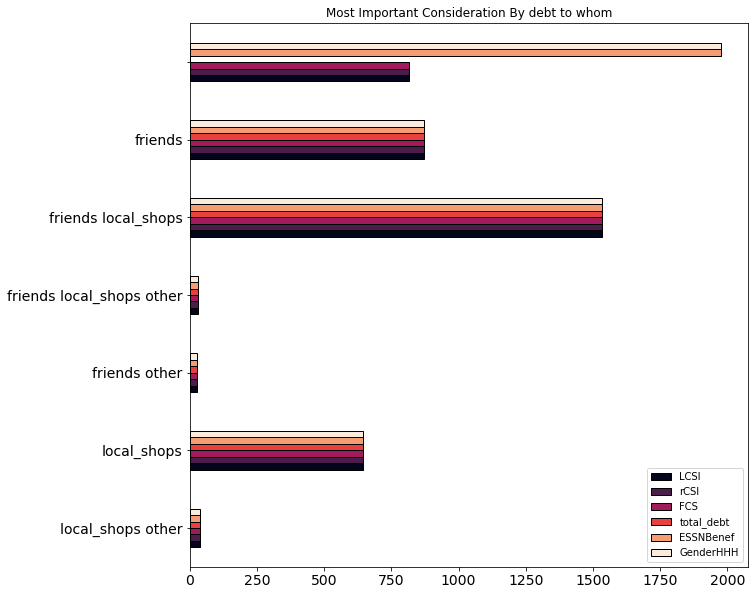

In [78]:
consideration_grouped[:-1].sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10, 10),
    cmap='rocket',
    edgecolor='black',
    fontsize=14,
    title='Most Important Consideration By debt to whom'
    ).yaxis.label.set_visible(False)

In [89]:
coping_str = dff[["MaxCopingBehavior", "aa"]]
coping_str_c = coping_str. groupby('MaxCopingBehavior').agg('count')
coping_str_c.head()

,ESSNBenef
MaxCopingBehavior,
Crisis coping strategies,1382
Emergency coping strategies,1203
HH not adopting coping strategies,272
Stress coping strategies,1127


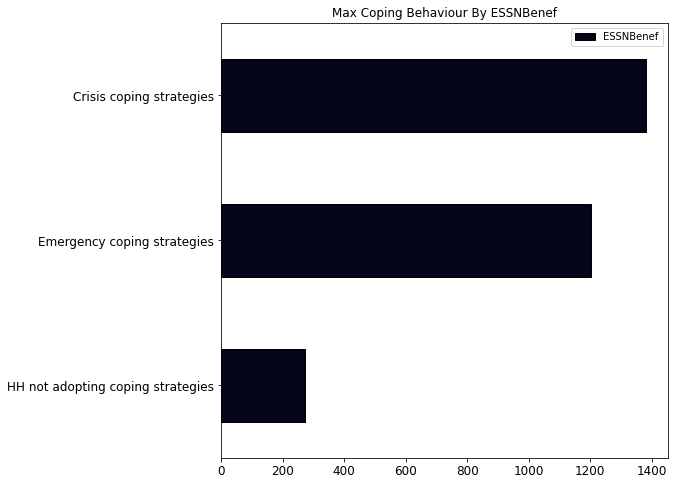

In [103]:
coping_str_c[:-1].sort_index(ascending=False).plot(
    kind='barh',
    figsize=(8, 8),
    cmap='rocket',
    edgecolor='black',   #çerçeve rengi
    fontsize=12,
    title='Max Coping Behaviour By ESSNBenef'
    ).yaxis.label.set_visible(False)


In [110]:
coping_str_1 = dff[["MaxCopingBehavior", "aa","total_debt", "x_total"]]
coping_str_1 = coping_str. groupby('MaxCopingBehavior').agg('count')
coping_str_1.head()

,ESSNBenef
MaxCopingBehavior,
Crisis coping strategies,1382
Emergency coping strategies,1203
HH not adopting coping strategies,272
Stress coping strategies,1127


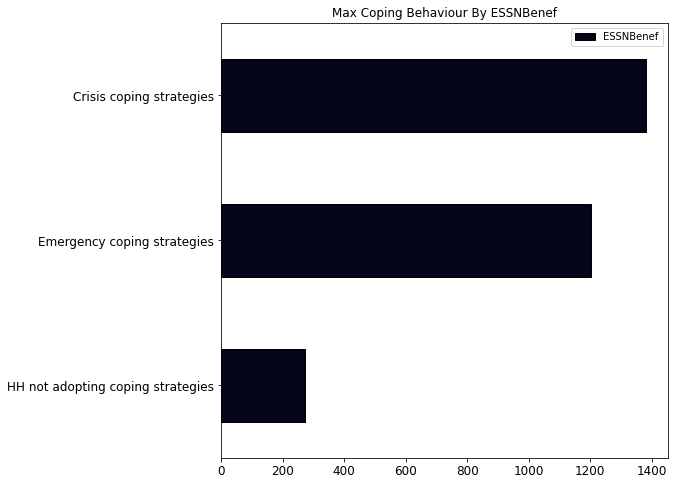

In [111]:
coping_str_1[:-1].sort_index(ascending=False).plot(
    kind='barh',
    figsize=(8, 8),
    cmap='rocket',
    edgecolor='black',   #çerçeve rengi
    fontsize=12,
    title='Max Coping Behaviour By ESSNBenef'
    ).yaxis.label.set_visible(False)

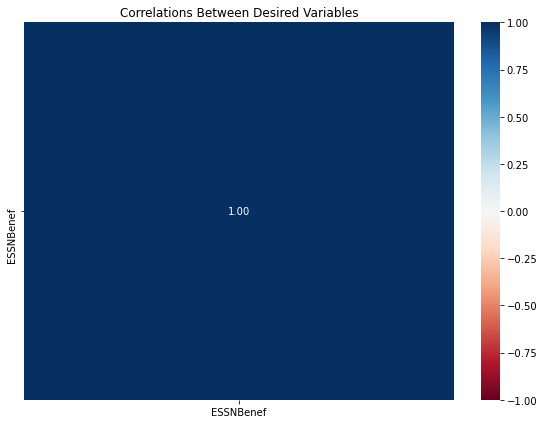

In [112]:
corr_matrix_1 = coping_str_1.corr(method='spearman')
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix_1, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Desired Variables")

plt.tight_layout()
plt.show()

In [128]:
dff["FCG"].value_counts()

acceptable    2059
borderline    1111
poor           814
Name: FCG, dtype: int64

In [130]:
%matplotlib inline

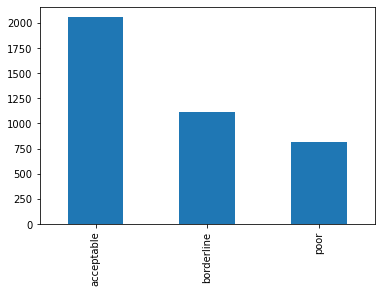

In [133]:
dff["FCG"].value_counts().plot(kind="bar")

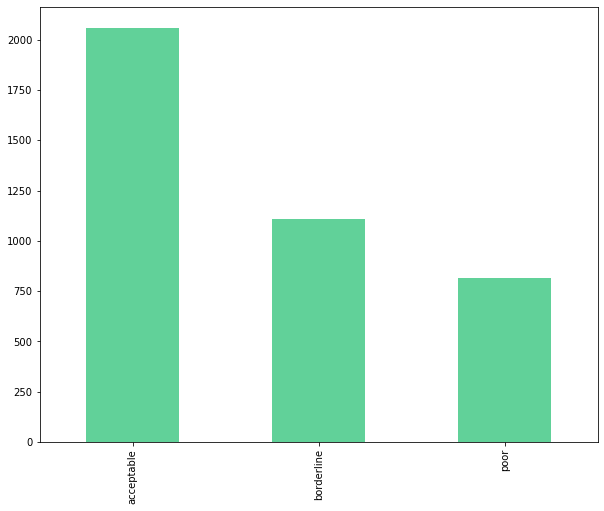

In [136]:
dff["FCG"].value_counts().plot(kind="bar", figsize=(10,8), color="#61d199")